In [1012]:
#import the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.api import qqplot

In [1013]:
# import the data

In [1014]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [1015]:
print("Train:",train.shape)
print("Test :",test.shape)

Train: (4209, 378)
Test : (4209, 377)


In [1016]:
#explore the data

In [1017]:
train.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [1018]:
train.columns[0:10]

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [1019]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [1020]:
dtype_test=test.dtypes.reset_index()
dtype_test.columns = ["Count", "Column Type"]
dtype_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,object,8


In [1021]:
numericals=['int64','float32','float16']
objects=['O']

train_num=train.select_dtypes(include=numericals)
train_object=train.select_dtypes(include=objects)

test_num=test.select_dtypes(include=numericals)
test_object=test.select_dtypes(include=objects)


In [1022]:
Con_features=list(train_num.columns)
Cat_features=list(train_object.columns)
print('Numerical:',len(Con_features),Con_features)
print('----------------------------------------------------------------')
print('Categorical:',len(Cat_features),Cat_features)

Numerical: 369 ['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X

In [1023]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1024]:
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# chechink for missing values

In [1025]:


missing_df = train.isnull().sum(axis=0).reset_index()

missing_df.columns = ['column_name', 'missing_count']

missing_df = missing_df.loc[missing_df['missing_count']>0]

missing_df = missing_df.sort_values(by='missing_count')

missing_df


,column_name,missing_count


In [1026]:
#There are no missing values

In [1027]:
for col in train_object.columns:
    print('Unique values in ' +col+ ' are',train_object[col].nunique())
    print(train_object[col].unique())

Unique values in X0 are 47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Unique values in X1 are 27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Unique values in X2 are 44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
Unique values in X3 are 7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
Unique values in X4 are 4
['d' 'b' 'c' 'a']
Unique values in X5 are 29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Unique values in X6 are 12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
Unique values in X8 are 25
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 

In [1028]:
for col in test_object:
    print('Unique values in ' +col+ ' are',test_object[col].nunique())
    print(test_object[col].unique())

Unique values in X0 are 49
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
Unique values in X1 are 27
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
Unique values in X2 are 45
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
Unique values in X3 are 7
['f' 'a' 'c' 'e' 'd' 'g' 'b']
Unique values in X4 are 4
['d' 'b' 'a' 'c']
Unique values in X5 are 32
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Unique values in X6 are 12
['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
Unique values in X8 are 25
['w'

# exploreing the 'y' value

In [1029]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

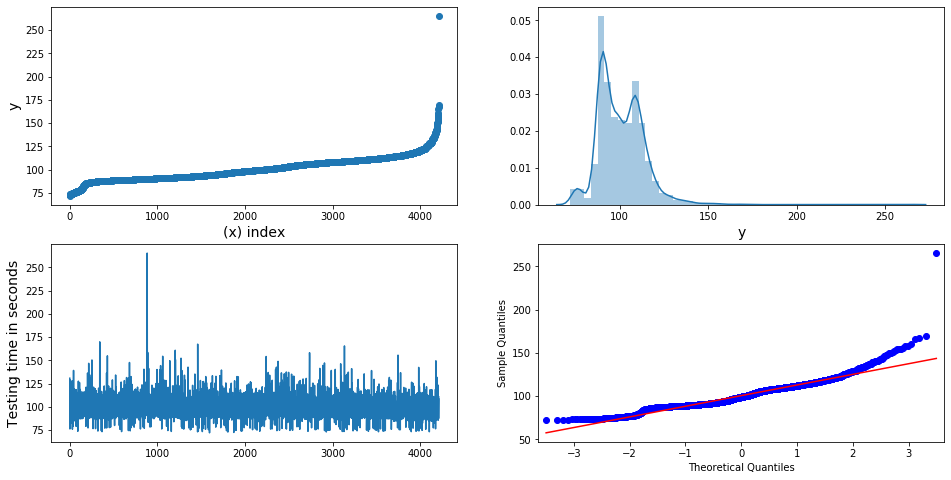

In [1030]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(ncols=2,nrows=2,figsize=(16,8))
ax1.scatter(range(train.shape[0]),np.sort(train.y.values))
ax1.set_xlabel('(x) index', fontsize=14)
ax1.set_ylabel('y', fontsize=14)

sns.distplot(train.y.values, bins=50, kde=True,ax=ax2)
ax2.set_xlabel('y', fontsize=14)

ax3.plot(train.y.values)
ax3.set_ylabel('Testing time in seconds', fontsize=14)

qqplot(train.y,ax=ax4,line='r',fit=False);

 1.The data is not normally distributed
 2. The data is positively skewed
 3. The mode of testing Time is around 95-100 secs
 4. The testing model as two distinct peaks

# normality test of 'y'

In [1031]:

from scipy.stats import shapiro,normaltest,kstest
stats,p=shapiro(train.y)
print('Stats score= %.3f , p_value=%.3f'%(stats,p))

Stats score= 0.939 , p_value=0.000


In [1032]:
stats,p=normaltest(train.y)
print('Stats score= %.3f , p_value=%.3f'%(stats,p))

Stats score= 1302.013 , p_value=0.000


### the test confirms that the'y' is not normally distrubuted

# Test of testing time againts the Categorical Columns

In [1033]:
Cat_features

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

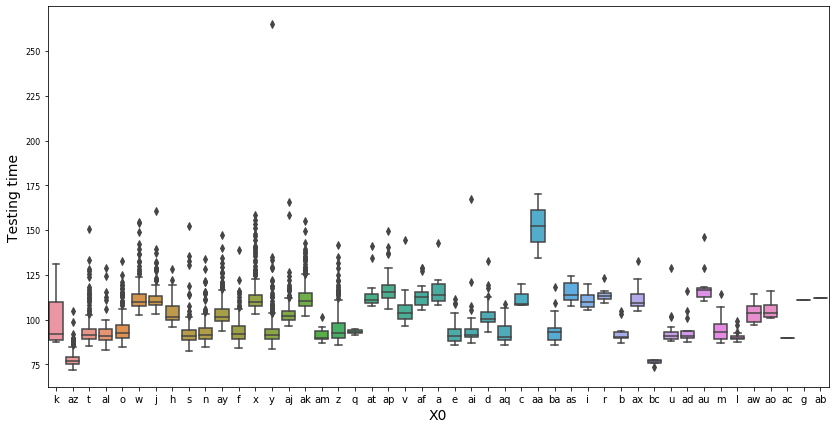

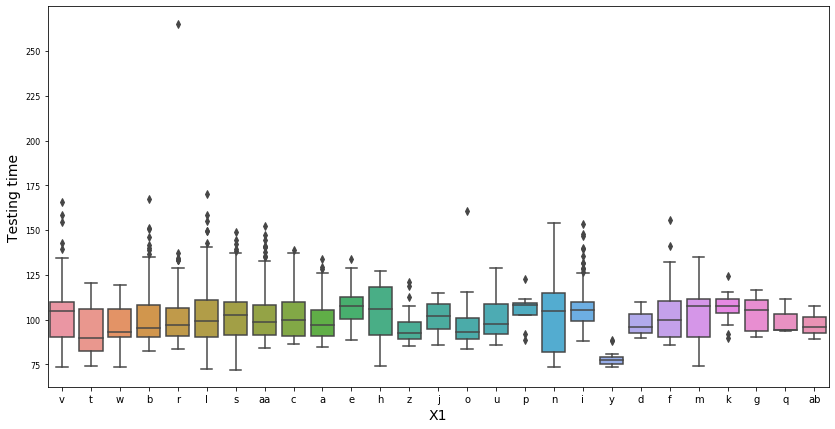

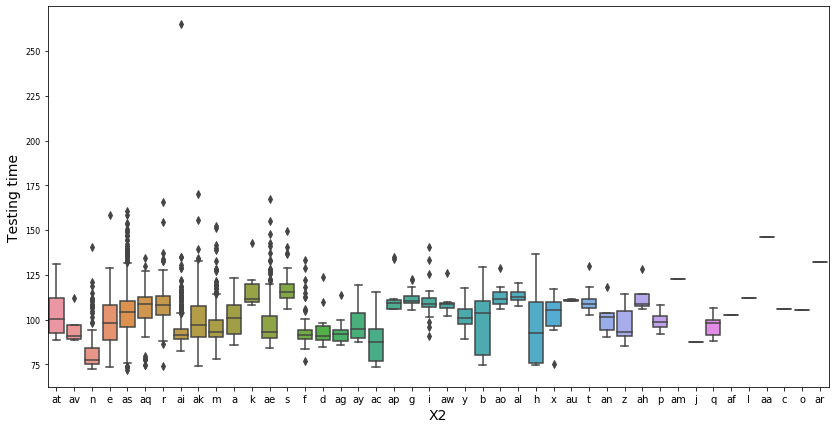

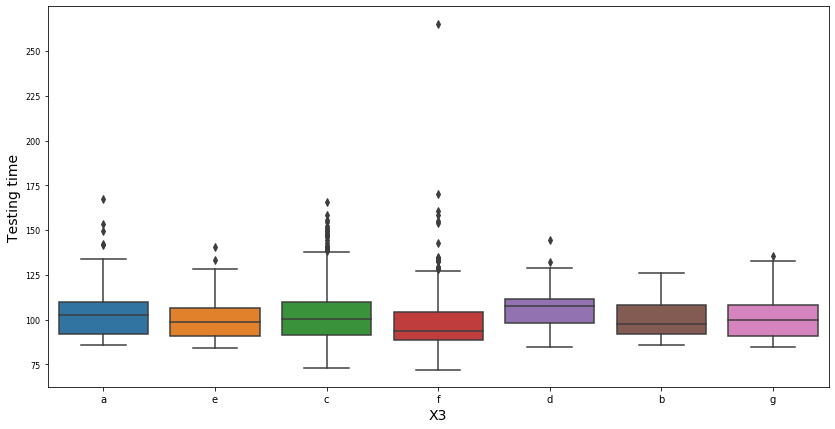

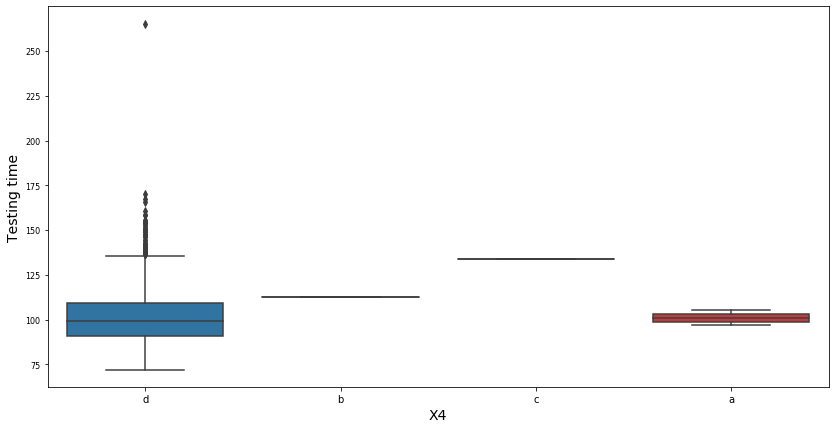

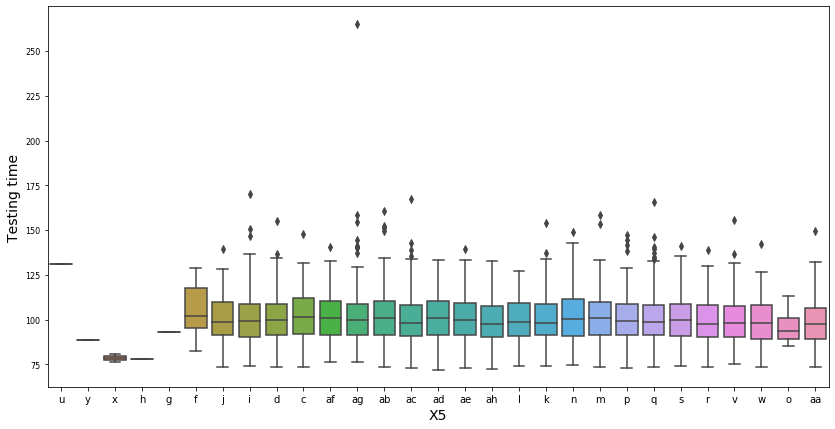

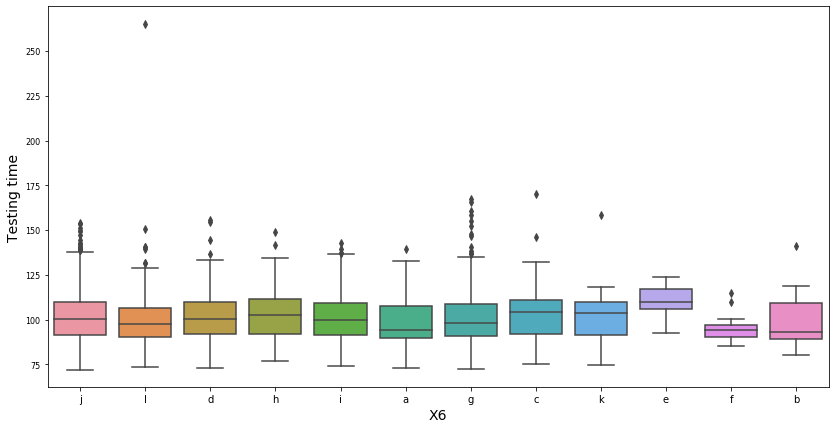

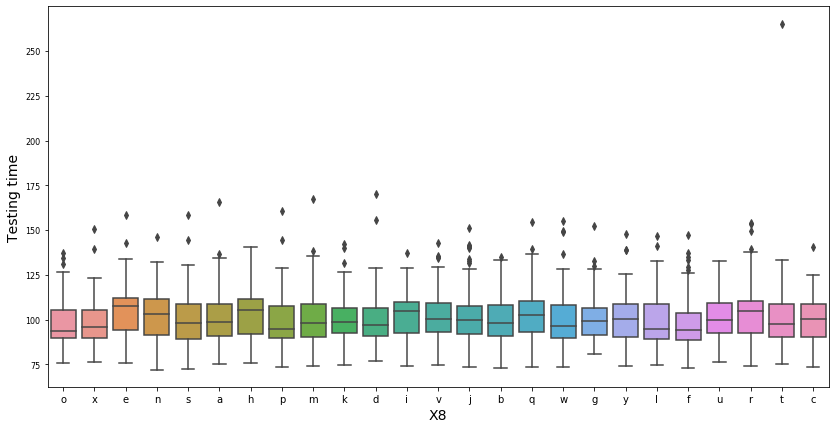

In [1034]:
for col in Cat_features:
    plt.figure(figsize=(14,7))
    sns.boxplot(x=col,y='y',data=train)
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Testing time',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=8)
    plt.show()

### Checking the how the responce variable 'y' is dependent on the categoical values i,e. x0,x1..x8
#### Using Anvova Test

In [1035]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1036]:
ft='+'.join(train_object.columns)
ft

'X0+X1+X2+X3+X4+X5+X6+X8'

In [1037]:
model=ols('y~'+ft,data=train).fit()
print('F-value:',model.fvalue)
print("p_ value : ",model.f_pvalue)


F-value: 32.09868921466911
p_ value :  0.0


In [1038]:
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
X0,206535.179273,46.0,66.318128,0.000000e+00
X1,1651.036730,26.0,0.937949,5.539314e-01
X2,4868.705236,43.0,1.672404,3.962290e-03
X3,359.486951,6.0,0.884969,5.048417e-01
X4,590.113729,3.0,2.905431,3.343685e-02
X5,6498.750565,28.0,3.428214,3.029852e-09
X6,778.815154,11.0,1.045774,4.023786e-01
X8,1478.635578,24.0,0.910010,5.887769e-01
Residual,272298.979688,4022.0,NaN,NaN


## The p-value obtained from Anova analysis is low(p<0.05),Except for 'X3' which we may consider droping to increase model accuracy
## we can also say that the 'y' Doesn't dependent on any  particular coloums but is fairly dependent on all the Categorical Value

### Pair test, post-Hoc

In [1039]:
 from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
for col in train_object.columns:
    print(col)
    pair_test=pairwise_tukeyhsd(endog=train.y,groups=train[col],alpha=0.05)
    
    
    reject_list=pd.Series(pair_test.reject)
    print(reject_list.value_counts())
    

    #print(pair_test.plot_simultaneous())
    #plt.show()

X0
False    553
True     528
dtype: int64
X1
False    312
True      39
dtype: int64
X2
False    781
True     165
dtype: int64
X3
False    13
True      8
dtype: int64
X4
False    5
True     1
dtype: int64
X5
False    406
dtype: int64
X6
False    62
True      4
dtype: int64
X8
False    275
True      25
dtype: int64


In [1040]:
# The post Hoc test result summary for 'X8'
print(pair_test.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b  -0.7736    0.9  -5.3682   3.821  False
     a      c  -0.1461    0.9  -5.7215  5.4293  False
     a      d  -0.5169    0.9  -6.0369  5.0032  False
     a      e   4.7173 0.0199   0.3143  9.1203   True
     a      f  -4.0283 0.1097  -8.3518  0.2952  False
     a      g  -0.0972    0.9  -5.2183  5.0238  False
     a      h   3.1872  0.863  -2.1067   8.481  False
     a      i   2.8544 0.7298  -1.4944  7.2032  False
     a      j   0.1962    0.9  -4.0026  4.3949  False
     a      k  -0.1429    0.9  -4.8324  4.5467  False
     a      l  -1.9129    0.9  -7.4695  3.6438  False
     a      m   0.2272    0.9  -4.6321  5.0865  False
     a      n   1.9352    0.9  -2.3924  6.2629  False
     a      o  -2.5121    0.9  -7.3023  2.2781  False
     a      p  -0.8693    0.9  -6.4447  4.7061  False
     a      q   2.2922    0.

## The post-Hoc show how the values are significent in each pair when  compaired with each other 

# Feature Selection for binary columns - (using f_regression test)
Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure

This is done in 2 steps:

The correlation between each regressor and the target is computed

It is converted to an F score then to a p-value.

In [1041]:
from sklearn.feature_selection import SelectKBest, f_regression
features = train_num.drop(['ID'],axis=1)
target   = train.y

In [1042]:
feature_select= SelectKBest(score_func=f_regression, k="all").fit(features,target)

C:\Users\abhil\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\abhil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\abhil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\abhil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [1043]:
scores  = list(feature_select.scores_)
pvalues = list(feature_select.pvalues_)
scores[:5], pvalues[:5]

([3.065618674114047,
  nan,
  34.1947262800572,
  9.827604131387977,
  163.8983133169354],
 [0.0800375973065553,
  nan,
  5.364599306858083e-09,
  0.0017309644763527116,
  7.691695936134151e-37])

In [1044]:
# Zipping up the columns and scores and p_values
col_scores = [(col, round(score, 2), round(pvalue, 4)) for col, score, pvalue in zip(features.columns, scores, pvalues)]
# Sorting out the table in reverse order to know which features doesn't have much importance
col_scores = sorted(col_scores, key = lambda x: x[2], reverse = True)
print(col_scores[:10])

[('X11', nan, nan), ('X40', 0.0, 0.9525), ('X32', 0.01, 0.9096), ('X18', 0.01, 0.9077), ('X92', 0.05, 0.8299), ('X24', 0.05, 0.8191), ('X42', 0.21, 0.6463), ('X83', 0.44, 0.5067), ('X93', nan, nan), ('X103', 0.28, 0.5971)]


In [1045]:
results_df = pd.DataFrame(col_scores, columns = ['Col_name', 'f_score', 'p_value'])
results_df

,Col_name,f_score,p_value
0,X11,NaN,NaN
1,X40,0.00,0.9525
2,X32,0.01,0.9096
3,X18,0.01,0.9077
4,X92,0.05,0.8299
...,...,...,...
363,X371,204.64,0.0000
364,X376,55.40,0.0000
365,X378,301.70,0.0000
366,X379,19.50,0.0000


In [1046]:
# Droplist creation for values that doesn't have much to offer
cols_to_drop1 = results_df[results_df['p_value'] > 0.05].Col_name.values
cols_to_drop1

array(['X40', 'X32', 'X18', 'X92', 'X24', 'X42', 'X83', 'X103', 'X49',
       'X89', 'X86', 'X38', 'X41', 'X87', 'X74', 'X33', 'X39', 'X36',
       'X26', 'X70', 'X59', 'X60', 'X58', 'X57', 'X15', 'X95', 'X73',
       'X10', 'X63', 'X65', 'X67', 'X210', 'X207', 'X257', 'X258', 'X230',
       'X254', 'X266', 'X200', 'X206', 'X248', 'X220', 'X213', 'X240',
       'X245', 'X203', 'X226', 'X288', 'X262', 'X259', 'X280', 'X253',
       'X260', 'X246', 'X340', 'X294', 'X175', 'X292', 'X296', 'X364',
       'X365', 'X332', 'X123', 'X366', 'X338', 'X145', 'X182', 'X139',
       'X384', 'X114', 'X117', 'X105', 'X168', 'X129', 'X164', 'X196',
       'X184', 'X181', 'X190', 'X192', 'X124', 'X153', 'X345', 'X295',
       'X319', 'X359', 'X186', 'X194', 'X369', 'X374', 'X357', 'X356',
       'X138', 'X146', 'X160', 'X358', 'X140', 'X173', 'X353', 'X385',
       'X324', 'X361', 'X133', 'X195', 'X104', 'X323', 'X161', 'X375',
       'X307', 'X143', 'X152', 'X326', 'X141', 'X318'], dtype=object)

# droping te columns which show Zero variance

In [1047]:
for col in results_df[results_df.isnull().any(axis=1)].Col_name.values:
    
    print('column name : {}, {} '.format(col, np.unique(train[col].values, return_counts=True)))

column name : X11, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X93, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X107, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X233, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X235, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X268, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X289, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X290, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X293, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X297, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X330, (array([0], dtype=int64), array([4209], dtype=int64)) 
column name : X347, (array([0], dtype=int64), array([4209], dtype=int64)) 


In [1048]:
#Droping the null values- This null values are due to this columns contains only '0' 
cols_to_drop2 = results_df[results_df.isnull().any(axis=1)].Col_name.values
cols_to_drop2

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [1049]:
data=pd.get_dummies(train,drop_first=True)


In [1050]:
print('New data shape:',data.shape)
data.head(10)

New data shape: (4209, 557)


,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,24,128.76,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,25,91.91,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,30,126.99,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1051]:
D_list=list(cols_to_drop1)+list(cols_to_drop2)
D_list.extend(['ID','y'])

In [1052]:
D_list=pd.DataFrame(data,columns=D_list)

In [1053]:
D_list

,X40,X32,X18,X92,X24,X42,X83,X103,X49,X89,...,X235,X268,X289,X290,X293,X297,X330,X347,ID,y
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,88.53
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,76.26
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,80.62
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,78.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,8405,107.39
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8406,108.77
4206,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8412,109.22
4207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8415,87.48


## Spliting the data into train and test data sets

In [1054]:
x=data.drop(D_list,axis=1)
#x=data.drop(['ID','y'],axis=1)
y=data['y']

In [1055]:
from sklearn.model_selection import train_test_split as split

x_train,x_test,y_train,y_test=split(x,y,test_size=0.25,random_state=5)

In [1056]:
x_train

,X12,X13,X14,X16,X17,X19,X20,X21,X22,X23,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
1941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3819,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2408,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2663,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3099,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1725,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4079,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2254,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1057]:
x_test

,X12,X13,X14,X16,X17,X19,X20,X21,X22,X23,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2737,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2307,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2106,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
579,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3057,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3802,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1058]:
y_train

1941    115.19
3819    111.22
2408     90.75
2663     92.08
3099    101.28
         ...  
3046     89.11
1725     90.26
4079     92.26
2254    118.53
2915     89.43
Name: y, Length: 3156, dtype: float64

In [1059]:
y_test

2737    101.68
2003    100.11
2307     89.07
2106    108.31
1771     99.84
         ...  
3333    110.84
579     101.00
3057     89.51
3802     88.63
515     116.87
Name: y, Length: 1053, dtype: float64

## Testing linear regression Models

In [1060]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg=LinearRegression()

# fit the data
Lin_reg.fit(x_train,y_train)

# predict (training samples)
y_pred=Lin_reg.predict(x_train)
print("\nTraining score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred))
print('R2 score: %.2f' % r2_score(y_train, y_pred))

# predict (training samples)
y_pred=Lin_reg.predict(x_test)
print("\nTesting score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))


Training score : 
Mean squared error: 55.82
R2 score: 0.64

Testing score : 
Mean squared error: 11650521095207915114987520.00
R2 score: -63387492097430694920192.00


## Testing Random Forest model

In [1061]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='sqrt',n_estimators=100,
                      n_jobs=None, oob_score=False)   
rfc.fit(x_train,y_train)

# predict (training samples)
y_pred = rfc.predict(x_train)

print("\nTraining score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred))
print('R2 score: %.2f' % r2_score(y_train, y_pred))


y_pred=rfc.predict(x_test)
print("\nTesting score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# KNN-Regressor 

In [1063]:
from sklearn.neighbors import KNeighborsRegressor

In [1064]:
knn = KNeighborsRegressor(n_neighbors=14, metric='hamming', weights= 'distance')

# fit the data
knn.fit(x_train, y_train)

# predict (training samples)
y_pred = knn.predict(x_train)

print("\nTraining score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred))
print('R2 score: %.2f' % r2_score(y_train, y_pred))

# predict (training samples)
y_pred = knn.predict(x_test)

print("\nTesting score : ")
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))


Training score : 
Mean squared error: 3.60
R2 score: 0.98

Testing score : 
Mean squared error: 110.30
R2 score: 0.40


# Using Gxg Boosting to incresaes the performance of the model

In [1065]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [1066]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest  = xgb.DMatrix(x_test,  label=y_test)


In [1067]:

    
'''params_grid = {
    'max_depth':[1, 2, 3],
    'learning_rate': np.linspace(1e-16, 1, 3),
    'subsample':np.arange(0.1,1,0.1),
    'colsample_bytree':[1,3,5,8,10],
    'eval_metric': ['mae','rmse'],
    'objective':'reg:linear'
}'''

xgb_params1={'max_depth':4,
 'min_child_weight':8,
 'eta': 0.35,
 'subsample': 0.9,
 'colsample_bytree':0.9,
 'objective': 'reg:linear',
 'reg_alpha':10,
 'reg_lambda':45,
 'eval_metric': 'mae',
 'validate_parameters':1
    }


In [1068]:
%%time
XGB=xgb.train(
                xgb_params1,
                dtrain,
                maximize=0,
                num_boost_round=999,
                evals=[(dtrain, 'train')],
                early_stopping_rounds=10,verbose_eval=5
                
            )

[00:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-mae:65.77968
Will train until train-mae hasn't improved in 10 rounds.
[5]	train-mae:8.57411
[10]	train-mae:5.04557
[15]	train-mae:5.10071
[20]	train-mae:5.07026
Stopping. Best iteration:
[10]	train-mae:5.04557

Wall time: 1.24 s


In [1069]:
# Predict
y_pred = XGB.predict(dtrain)

print("Training : metrics ...")
print('Mean Abs Error   MAE    : ', mean_absolute_error(y_train, y_pred))
print('Mean Sq  Error MSE      : ', mean_squared_error(y_train, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(mean_squared_error(y_train, y_pred)))

print('r2 value                : ', r2_score(y_train, y_pred))


y_pred = XGB.predict(dtest)

print('\n')
print("Testing : metrics ...")
print('Mean Abs Error   MAE    : ', mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

print('r2 value                : ', r2_score(y_test, y_pred))

Training : metrics ...
Mean Abs Error   MAE    :  5.070254951157952
Mean Sq  Error MSE      :  59.173144858780915
Root Mean Sq Error RMSE :  7.692408261317188
r2 value                :  0.6130891427032312


Testing : metrics ...
Mean Abs Error   MAE    :  5.4060020085956975
Mean Sq  Error MSE      :  89.98948842139801
Root Mean Sq Error RMSE :  9.486278955491347
r2 value                :  0.5103903130556582


# Using the XGBoosting we where able to increase the R2 of the prediction 

In [1070]:
sub = pd.DataFrame()
sub['ID'] =y_test
sub['y'] = y_pred
sub.to_csv('xgb.csv', index=False)

sub.head()

,ID,y
2737,101.68,104.881653
2003,100.11,102.671112
2307,89.07,95.155464
2106,108.31,94.341812
1771,99.84,95.778931
